# Model Evaluation and Overfitting 

In [1]:
# import libraries
import numpy as np
import pandas as pd

## Review: Decision Tree Classification

In [2]:
# load training dataset (the supermarket dataset after data processing)
df = pd.read_csv('supermarket_new.csv')

In [3]:
df.shape

(1000, 22)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male,Cash,Credit card,Ewallet
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,1,0,0,0,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,1,0,1,0,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,0,1,0,1,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,0,1,0,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,0,1,0,0,1


In [6]:
# define independent variables / attributes / features
features = ['Quantity','Female', 'Cash','Credit card'] 

In [7]:
# define target variable
target = ['Customer type']

In [8]:
# get defined dataset
X = df [features]
y = df [target]

In [9]:
# randomly split data into 70% and 30%, put 30% in testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

In [10]:
# import DecisionTreeClassifier and define full-grown tree model
from sklearn.tree import DecisionTreeClassifier
fullmodel = DecisionTreeClassifier(criterion='entropy')

In [11]:
# fit the model by 70% training data
fullmodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# test model using testing data
y_pred = fullmodel.predict(X_test)
y_pred

array(['Normal', 'Normal', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Normal', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Normal', 'Normal', 'Member', 'Normal', 'Normal',
       'Member', 'Member', 'Normal', 'Member', 'Member', 'Member',
       'Normal', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Normal', 'Normal', 'Member', 'Normal', 'Member', 'Member',
       'Member', 'Normal', 'Normal', 'Member', 'Member', 'Member',
       'Member', 'Normal', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Normal', 'Member',
       'Normal', 'Normal', 'Normal', 'Normal', 'Member', 'Normal',
       'Member', 'Normal', 'Normal', 'Normal', 'Member', 'Member',
       'Normal', 'Member', 'Member', 'Normal', 'Member', 'Normal',
       'Member', 'Member', 'Member', 'Member', 'Normal', 'Member',
       'Normal', 'Member', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Normal', 'Member', 'Memb

## Model Evaluation

In [13]:
# import evaluation functions from sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Accuracy

In [14]:
# accuracy of testing data
# normalize=True (by default) returns the fraction of correctly classified samples
# Otherwise, return the numbers

print("Accuracy of testing data:",accuracy_score(y_test, y_pred, normalize=True))

Accuracy of testing data: 0.49666666666666665


In [15]:
print("Accuracy of testing data:",accuracy_score(y_test, y_pred, normalize=False))

Accuracy of testing data: 149


In [68]:
149/300

0.49666666666666665

In [18]:
# help(accuracy_score)

### Confusion Matrix

In [19]:
print(confusion_matrix(y_test, y_pred))

[[86 63]
 [88 63]]


In [20]:
len(y_test)

300

In [21]:
86+63+88+63

300

In [23]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [24]:
# display confusion matrix in a more readable way

conf=confusion_matrix(y_test, y_pred)

TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]

(TP,FP,TN,FN)

(63, 63, 86, 88)

#### Examples to better understand confusion matrix

In [25]:
d= {'Actual': [0, 1, 0, 1], 'Predicted': [1, 1, 1, 0]}
pd.DataFrame(d, columns=['Actual','Predicted'])

,Actual,Predicted
0,0,1
1,1,1
2,0,1
3,1,0


In [26]:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]])

### Classification Report

In [27]:
# precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Member       0.49      0.58      0.53       149
      Normal       0.50      0.42      0.45       151

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.50      0.50      0.49       300



In [28]:
# precision of Normal TP/(TP+FP)
63/(63+63)

0.5

In [29]:
# precision of Member TN/(TN+FN) 
86/(86+88)

0.4942528735632184

In [30]:
# help(classification_report)

In [31]:
y_train.head()

,Customer type
742,Member
676,Member
571,Member
99,Normal
78,Member


In [32]:
target_names = y_train['Customer type'].unique().tolist()
target_names

['Member', 'Normal']

In [33]:
# y_test.value_counts()
y_test['Customer type'].value_counts()

Normal    151
Member    149
Name: Customer type, dtype: int64

## Overfitting

In [34]:
print("Accuracy of testing data:",accuracy_score(y_test, y_pred, normalize=True))

Accuracy of testing data: 0.49666666666666665


In [35]:
y_pred_train = fullmodel.predict(X_train)

In [36]:
print("Accuracy of training data:",accuracy_score(y_train, y_pred_train, normalize=True))

Accuracy of training data: 0.62


## Tune Parameters: Depth

In [37]:
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
treeObj = fullmodel.tree_
treedepth = model_1.tree_

In [39]:
# full model nodes
treeObj.node_count

119

In [40]:
# tuned model nodes
treedepth.node_count

27

In [41]:
# full model depth
treeObj.max_depth

9

In [42]:
# tuned model depth
treedepth.max_depth

4

### Accuracy of Tuned Model

In [43]:
y_pred_1 = model_1.predict(X_test)
accuracy_score(y_test, y_pred_1, normalize=True)

0.5133333333333333

In [44]:
y_pred_train_1 = model_1.predict(X_train)
accuracy_score(y_train, y_pred_train_1, normalize=True)

0.5785714285714286

In [45]:
# import libraries for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from IPython.display import Image
import pydotplus

In [46]:
target_names = df['Customer type'].unique().tolist()
target_names

['Member', 'Normal']

In [47]:
# create dot file
dot_data_1 = tree.export_graphviz(model_1, feature_names=features, class_names
=target_names, filled = True, rounded=True, special_characters=True)

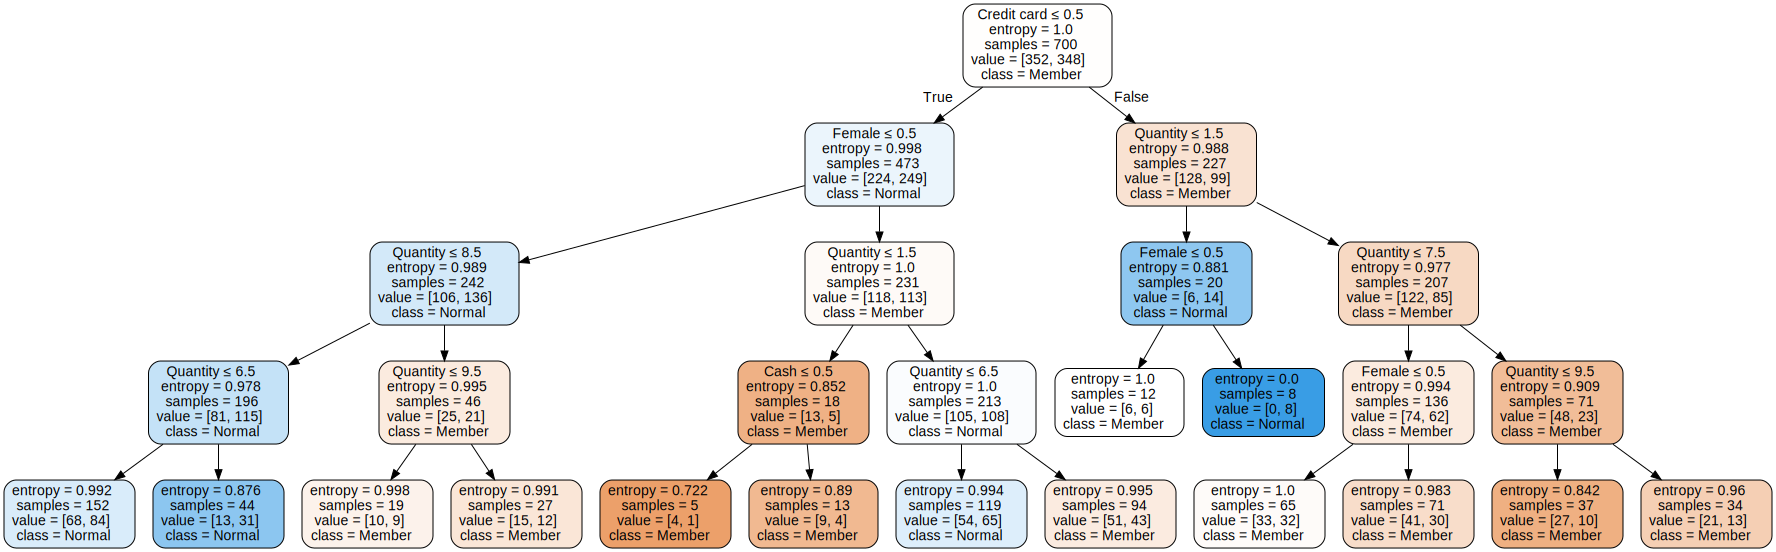

In [48]:
# transform dot file to graph
graph_1 = graphviz.Source(dot_data_1)
graph_1

In [49]:
# store graph in pdf
graph_1.render("Tuned_DT")

'Tuned_DT.pdf'

### Alternative Way of Testing Accuracy: Cross Validation

In [50]:
# import cross-validation function
from sklearn.model_selection import cross_val_score

In [51]:
# do 10-fold cross-validation (by default cv=5)
score_cv = cross_val_score(fullmodel, X, y, cv=5)

In [52]:
# check the accuracy result from each run of cross-validation
print(score_cv)

[0.54  0.49  0.515 0.55  0.49 ]


In [53]:
# average of the accuracy result
score_cv.mean()

0.517

In [54]:
score_cv_tuned = cross_val_score(model_1, X, y, cv=5)
score_cv_tuned.mean()

0.535

In [55]:
score_cv_tuned

array([0.555, 0.505, 0.585, 0.515, 0.515])

### Finding Optimal Parameters: Grid  Search

In [56]:
# package for exhaustive grid search

from sklearn.model_selection import GridSearchCV

In [57]:
# start with an initial guess for parameters
    # first grid search assessed 4 × 4 × 5 = 80 combinations
    
param_grid = {
'max_depth': [10, 20, 30, 40], # 4 values
'min_samples_split': [10, 20, 30, 40], # 4 values
'min_samples_leaf': [5, 10, 15, 20, 25], # 5 values
} 


# grid search with 5-fold cross-validation 
# n_jobs: number of jobs to run in parallel. -1 means using all processors

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=123),
 param_grid, cv=5, n_jobs=-1) 

In [58]:
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.54
Initial parameters:  {'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 10}


In [59]:
# Adapt grid based on result from initial grid search
    # exhaustively search value around initial best parameters
    # first grid search assessed 13 × 10 × 10 = 1300 combinations

param_grid_best = {
'max_depth': list(range(2, 15)), # 13 values
'min_samples_split': list(range(5, 15)), # 10 values
'min_samples_leaf': list(range(20, 30)), # 10 values
}

In [60]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid_best, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.5414285714285715
Improved parameters:  {'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 5}


In [61]:
# record tree with best parameters
bestClassTree = gridSearch.best_estimator_

# create dot file
dot_best = tree.export_graphviz(bestClassTree, feature_names=features, class_names
=target_names, filled = True, rounded=True, special_characters=True)

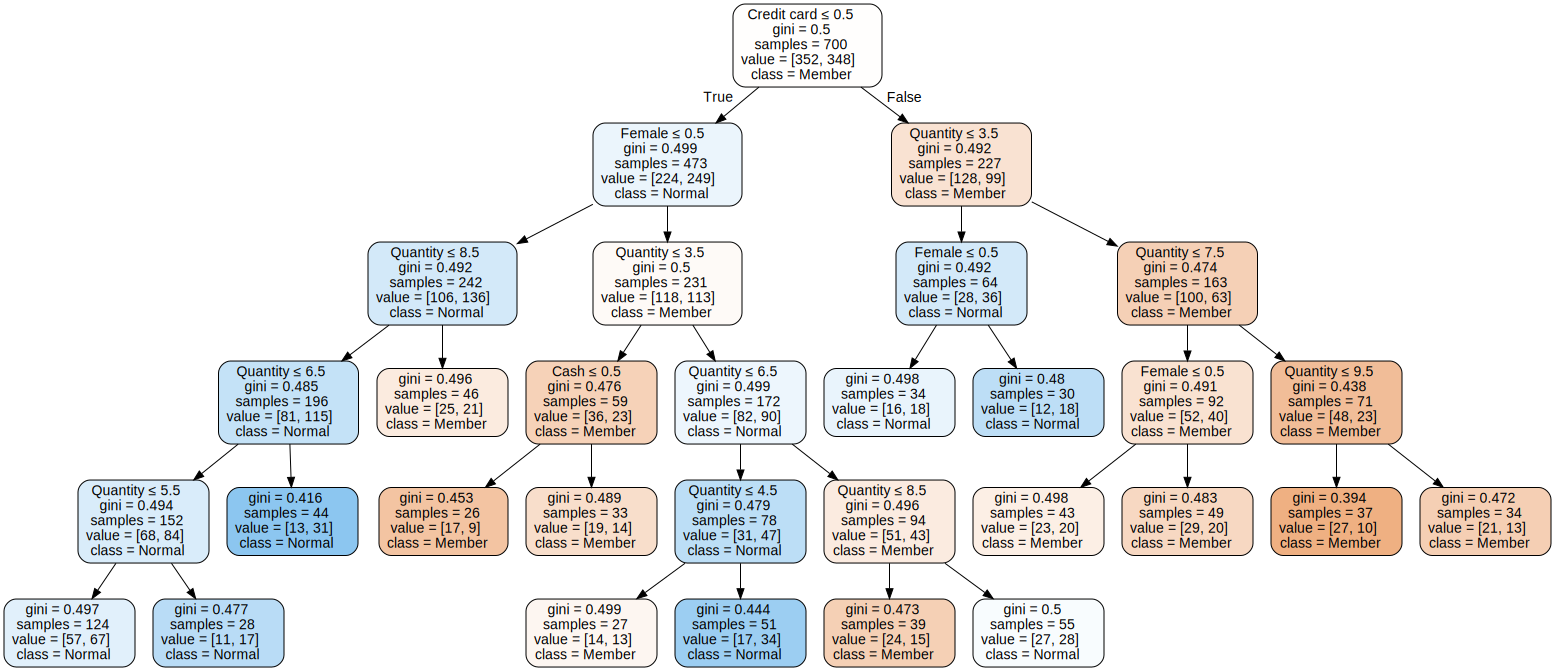

In [62]:
# transform dot file to graph
graph_best = graphviz.Source(dot_best)
graph_best

In [63]:
graph_best.render("Best_DT")

'Best_DT.pdf'

In [66]:
# y_pred_best = bestClassTree.predict(X_test)

In [67]:
# accuracy_score(y_test, y_pred_best, normalize=True)